<a href="https://colab.research.google.com/github/Medulla06/MIMO/blob/main/MIMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIMO Channel Estimation using Score-Based (Diffusion) Generative Models

##Tasks


1.   Implement code to test various hyperparameters such as L,M, alpha and beta. Check if they are matching with the theoretical results or not.
2.   Analyze the sensitivity of these hyperparameters using a different, non-CDL dataset to generalize the findings.
3.   Investigate why the paper has chosen M = 3 and estimate the runtime of the model for different values of L and M.

4.   Compare the theoretical and simulation results to evaluate if they align in terms of performance across different test scenarios.

5.   Simulate the model with the given algorithm and see the convergence of the model.

In [ ]:
!git clone https://github.com/utcsilab/score-based-channels.git

Cloning into 'score-based-channels'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 337 (delta 91), reused 81 (delta 78), pack-reused 207 (from 1)
Receiving objects: 100% (337/337), 23.54 MiB | 10.70 MiB/s, done.
Resolving deltas: 100% (172/172), done.


In [ ]:
%cd score-based-channels
!pwd
!python3.10 -m venv .venv
!source .venv/bin/activate


/mnt/test-mimo/score-based-channels
/mnt/test-mimo/score-based-channels


In [ ]:
!pip install -r requirements.txt


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118


In [ ]:
!mkdir data
!curl -L https://utexas.box.com/shared/static/nmyg5s06r6m2i5u0ykzlhm4vjiqr253m.mat --output ./data/CDL-C_Nt64_Nr16_ULA0.50_seed1234.mat
!curl -L https://utexas.box.com/shared/static/2a7tavjo9hk3wyhe9vv0j7s2l6en4mj7.mat --output ./data/CDL-C_Nt64_Nr16_ULA0.50_seed4321.mat


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    10    0    10    0     0      6      0 --:--:--  0:00:01 --:--:--    12
100 1507M  100 1507M    0     0  10.5M      0  0:02:22  0:02:22 --:--:-- 10.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100     8    0     8    0     0      4      0 --:--:--  0:00:01 --:--:--  8000
100 15.0M  100 15.0M    0     0  3494k      0  0:00:04  0:00:04 --:--:-- 8762k


In [ ]:
!mkdir -p models/score/CDL-C
!curl -L https://utexas.box.com/shared/static/4nubcpvpuv3gkzfk8dgjo6ay0ssps66w.pt --output ./models/score/CDL-C/final_model.pt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100     8    0     8    0     0      4      0 --:--:--  0:00:01 --:--:--     7
100 68.7M  100 68.7M    0     0  7468k      0  0:00:09  0:00:09 --:--:-- 10.8M


In [ ]:
!pwd
!ls

/mnt/test-mimo/score-based-channels
aux_gan.py	models			  test_ldamp.py
aux_models.py	ncsnv2			  test_ml.py
aux_unet.py	plot_ood_results.py	  test_mmse.py
basicmodels.py	pretrained_models	  test_score.py
data		README.md		  train_ldamp.py
figures		requirements.txt	  train_score.py
license.txt	sample_data		  train_wgan.py
loaders.py	test_em_gm_amp.m	  tune_hparams_score.py
matlab		test_l1Fourier_lifted.py


In [ ]:
!python train_score.py

Streaming output truncated to the last 5000 lines.
35it [00:09,  3.55it/s]
36it [00:10,  3.52it/s]
37it [00:10,  3.79it/s]
38it [00:10,  3.91it/s]
39it [00:10,  3.85it/s]
40it [00:11,  3.87it/s]
41it [00:11,  3.62it/s]
42it [00:11,  3.63it/s]
43it [00:12,  3.58it/s]
44it [00:12,  3.73it/s]
45it [00:12,  3.81it/s]
46it [00:12,  3.75it/s]
47it [00:13,  3.87it/s]
48it [00:13,  3.95it/s]
49it [00:13,  4.09it/s]
50it [00:13,  4.04it/s]
51it [00:13,  4.12it/s]
52it [00:14,  4.09it/s]
53it [00:14,  4.02it/s]
54it [00:14,  4.00it/s]
55it [00:14,  3.96it/s]
56it [00:15,  3.57it/s]
57it [00:15,  3.78it/s]
58it [00:15,  3.96it/s]
59it [00:16,  3.88it/s]
60it [00:16,  3.88it/s]
61it [00:16,  3.82it/s]
62it [00:16,  3.75it/s]
63it [00:17,  3.64it/s]
64it [00:17,  3.74it/s]
65it [00:17,  3.35it/s]
66it [00:18,  3.51it/s]
67it [00:18,  3.70it/s]
68it [00:18,  3.52it/s]
69it [00:18,  3.18it/s]
70it [00:19,  3.00it/s]
71it [00:19,  3.22it/s]
72it [00:19,  3.13it/s]
73it [00:20,  3.12it/s]
74it [00:20, 

In [ ]:
!python test_score.py

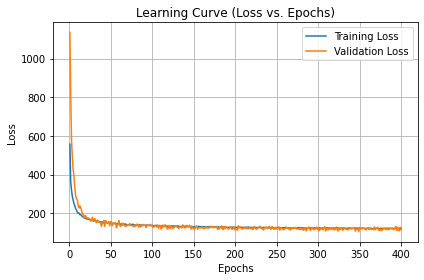

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

checkpoint = torch.load('models/score/CDL-C/final_model.pt')
train_loss = checkpoint['train_loss']
val_loss = checkpoint['val_loss']
# After the training loop, plot the learning curve
epochs = range(1, 401)
train_loss_per_epoch = np.mean(np.array(train_loss).reshape(400, 312), axis=1)
plt.plot(epochs, train_loss_per_epoch, label='Training Loss')

# Plot validation loss (averaged across spacings if needed)
val_loss = np.array(val_loss).reshape(416, 3)
val_loss_mean = np.mean(val_loss, axis=1)
if len(val_loss_mean) != len(epochs):
    print(f"Warning: Validation loss has {len(val_loss_mean)} points, expected {len(epochs)}")

plt.plot(epochs, val_loss_mean[:400], label='Validation Loss')

plt.title('Learning Curve (Loss vs. Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

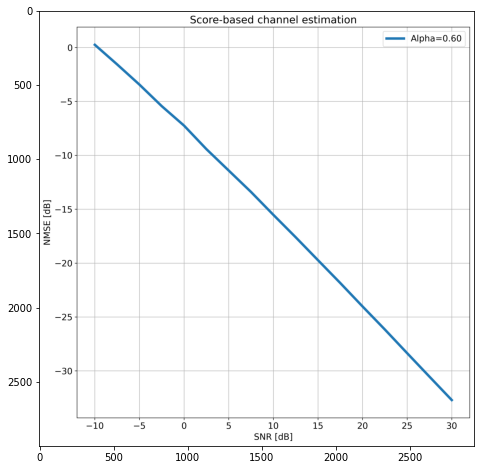

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
image_path = 'results/score/train-CDL-C_test-CDL-C/results.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.show()

In [ ]:
!python tune_hparams_score.py

Streaming output truncated to the last 5000 lines.
 38%|███████████████▎                        | 886/2311 [12:12<19:38,  1.21it/s]

 38%|███████████████▎                        | 887/2311 [12:13<19:37,  1.21it/s]

 38%|███████████████▎                        | 888/2311 [12:14<19:36,  1.21it/s]

 38%|███████████████▍                        | 889/2311 [12:15<19:35,  1.21it/s]

 39%|███████████████▍                        | 890/2311 [12:16<19:34,  1.21it/s]

 39%|███████████████▍                        | 891/2311 [12:16<19:34,  1.21it/s]

 39%|███████████████▍                        | 892/2311 [12:17<19:33,  1.21it/s]

 39%|███████████████▍                        | 893/2311 [12:18<19:32,  1.21it/s]

 39%|███████████████▍                        | 894/2311 [12:19<19:32,  1.21it/s]

 39%|███████████████▍                        | 895/2311 [12:20<19:31,  1.21it/s]

 39%|███████████████▌                        | 896/2311 [12:20<19:30,  1.21it/s]

 39%|███████████████▌                        | 